In [ ]:
#####################################################################################
# Audio-driven upper-body motion synthesis on a humanoid robot
# Computer Science Tripos Part III Project
# Jan Ondras (jo356@cam.ac.uk), Trinity College, University of Cambridge
# 2017/18
#####################################################################################
# Data distributions (video durations, number of frames)
# And also elimination of the outlier subject 19 (see last cell)
#####################################################################################

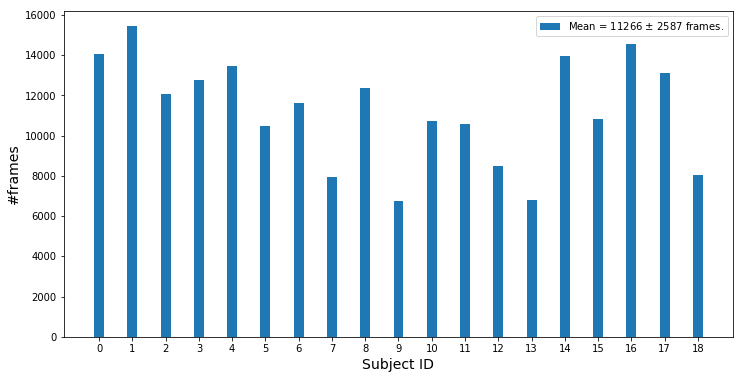

In [6]:
###############################################################################################################
# Distribution of frame count per SID (without subject 19)
###############################################################################################################

import numpy as np
import time
import glob
import matplotlib.pyplot as plt

TE_folder = 'TrainingExamples_16kHz'
unique_srt_VIDs = np.load('./../Dataset/'+TE_folder+'/te_unique_srt_VIDs.npz')['unique_srt_VIDs']
unique_srt_SIDs = np.array([x[:5] for i, x in enumerate(unique_srt_VIDs) if i % 2 == 0]) # ['PID02', 'PID05', ..

SID_frames = []

for SID in unique_srt_SIDs:
    d = np.load('./../Dataset/'+TE_folder+'/Dataset_split/split_masks_' + SID + 'Task2.npz')
    cnt = len(d['train_mask']) + len(d['val_mask']) + len(d['test_mask'])
    d = np.load('./../Dataset/'+TE_folder+'/Dataset_split/split_masks_' + SID + 'Task3.npz')
    cnt += len(d['train_mask']) + len(d['val_mask']) + len(d['test_mask'])
    
    SID_frames.append( cnt )

plt.figure(figsize=(12,6))
w =0.3
xaxis = np.arange(len(SID_frames))
plt.bar(xaxis, SID_frames, 
        width=w)#, align='edge', label=p, bottom=1., color=clrs[i])
plt.xticks(xaxis, xaxis, rotation=0)
plt.ylabel('#frames', fontsize=14)
plt.xlabel('Subject ID', fontsize=14)
plt.legend(['Mean = {:.0f} $\pm$ {:.0f} frames.'.format(np.mean(SID_frames), np.std(SID_frames))])
plt.show()

In [ ]:
###############################################################################################################
# Distribution of frame count per SID (all 20 subjects)
###############################################################################################################

import numpy as np
import time
import glob
import matplotlib.pyplot as plt

TE_folder = 'TrainingExamples_16kHz'
unique_srt_VIDs = np.array(sorted( [x.split('/')[-1] for x in glob.glob('./../Dataset/ImgSeq/*') ] )) # sorted VIDs
unique_srt_SIDs = np.array([x[:5] for i, x in enumerate(unique_srt_VIDs) if i % 2 == 0]) # ['PID02', 'PID05', ..

SID_frames = []

for SID in unique_srt_SIDs:
    d = np.load('./../Dataset/'+TE_folder+'/Dataset_split/split_masks_' + SID + 'Task2.npz')
    cnt = len(d['train_mask']) + len(d['val_mask']) + len(d['test_mask'])
    d = np.load('./../Dataset/'+TE_folder+'/Dataset_split/split_masks_' + SID + 'Task3.npz')
    cnt += len(d['train_mask']) + len(d['val_mask']) + len(d['test_mask'])
    
    SID_frames.append( cnt )

plt.figure(figsize=(12,6))
w =0.3
xaxis = np.arange(len(SID_frames))
plt.bar(xaxis, SID_frames, 
        width=w)#, align='edge', label=p, bottom=1., color=clrs[i])
plt.xticks(xaxis, xaxis, rotation=0)
plt.ylabel('#frames', fontsize=14)
plt.xlabel('Subject ID', fontsize=14)
plt.legend(['Mean = {:d} $\pm$ {:d} frames.'.format(np.mean(SID_frames), np.std(SID_frames))])
plt.show()


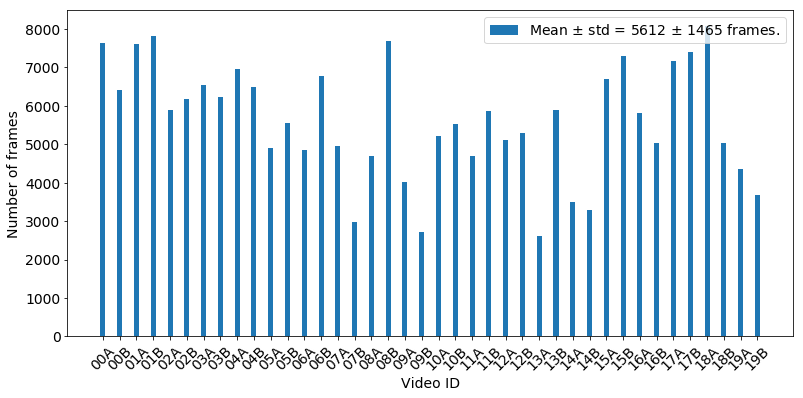

MIN =  2603
MAX =  8081


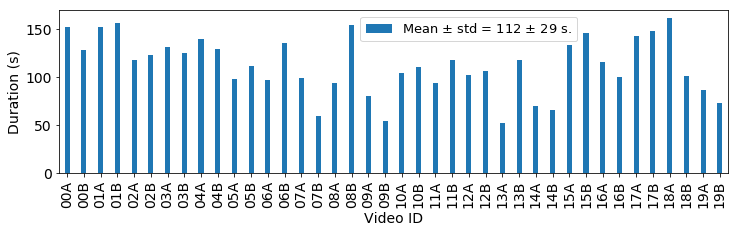

MIN =  52.06
MAX =  161.62


In [78]:
###############################################################################################################
# Distribution of frame count per VID (all 20 subjects)
###############################################################################################################

import numpy as np
import time
import glob
import matplotlib.pyplot as plt

TE_folder = 'TrainingExamples_16kHz'
unique_srt_VIDs = np.array(sorted( [x.split('/')[-1] for x in glob.glob('./../Dataset/ImgSeq/*') ] )) # sorted VIDs
unique_srt_SIDs = np.array([x[:5] for i, x in enumerate(unique_srt_VIDs) if i % 2 == 0]) # ['PID02', 'PID05', ..

VID_frames = []

for VID in unique_srt_VIDs:
    d = np.load('./../Dataset/'+TE_folder+'/Dataset_split_ALL20/split_masks_' + VID + '.npz')
    cnt = len(d['train_mask']) + len(d['val_mask']) + len(d['test_mask'])
    
    VID_frames.append( cnt )
    

# plt.figure(figsize=(12,6))
plt.figure(figsize=(13,6))
w =0.3
xaxis = np.arange(len(VID_frames))
xaxis_labels = []
for i, x in enumerate(xaxis):
    if i % 2 == 0:
        t = 'A'
    else:
        t = 'B'
    xaxis_labels.append( '{:02d}{:}'.format(int(x/2), t)  )
plt.bar(xaxis, VID_frames, 
        width=w)#, align='edge', label=p, bottom=1., color=clrs[i])
plt.xticks(xaxis, xaxis_labels, rotation=45)
plt.ylabel('Number of frames')#, fontsize=14)
plt.xlabel('Video ID')#, fontsize=14)
plt.legend(['Mean $\pm$ std = {:.0f} $\pm$ {:.0f} frames.'.format(np.mean(VID_frames), np.std(VID_frames))])
plt.show()
print "MIN = ", np.min(VID_frames)
print "MAX = ", np.max(VID_frames)

###############################################################################################################
# Distribution of duration per VID (all 20 subjects)
###############################################################################################################
FPS = 50.
durations = np.array(VID_frames)/FPS

import matplotlib
matplotlib.rcParams.update({'font.size': 14})



plt.figure(figsize=(12,3))
w =0.3
xaxis = np.arange(len(durations))
xaxis_labels = []
for i, x in enumerate(xaxis):
    if i % 2 == 0:
        t = 'A'
    else:
        t = 'B'
    xaxis_labels.append( '{:02d}{:}'.format(int(x/2), t)  )
plt.bar(xaxis, durations, 
        width=w)#, align='edge', label=p, bottom=1., color=clrs[i])
plt.xticks(xaxis, xaxis_labels, rotation=90)
plt.ylabel('Duration (s)')#, fontsize=14)
plt.xlabel('Video ID')#, fontsize=14)
plt.xlim(-0.5, 39.5)
ax = plt.gca()
# ax.legend()
plt.legend(['Mean $\pm$ std = {:.0f} $\pm$ {:.0f} s.'.format(np.mean(durations), np.std(durations))], 
           fontsize=13,
           loc='right', bbox_to_anchor=(0.784,0.885)
          )
plt.show()
print "MIN = ", np.min(durations)
print "MAX = ", np.max(durations)

In [ ]:
###############################################################################################################
# Eliminate subject 19: based on the fact that the LFTD 3D pose estimation method fails on their videos
# DONE
###############################################################################################################
import glob
import numpy as np

unique_srt_VIDs = []
for VID in sorted( [x.split('/')[-1] for x in glob.glob('./../Dataset/ImgSeq/*') ] ):
    if VID == 'PID19Task2' or VID == 'PID19Task3':
        continue
    unique_srt_VIDs.append( VID ) 
    
print unique_srt_VIDs
print len(unique_srt_VIDs)
TE_folder = 'TrainingExamples_16kHz'
np.savez('./../Dataset/'+TE_folder+'/te_unique_srt_VIDs.npz', unique_srt_VIDs=unique_srt_VIDs)
# unique_srt_VIDs = np.load('./../Dataset/'+TE_folder+'/te_unique_srt_VIDs.npz')['unique_srt_VIDs']